Code FInal


In [ ]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return (rgb_colors + hex_colors)

[array([0.0613518 , 0.05422619, 0.05430185]),
 array([78.21814132, 61.65734999, 61.27620316]),
 array([51.71005675, 40.38821625, 40.97176982]),
 '#000000',
 '#4e3d3d',
 '#332828']

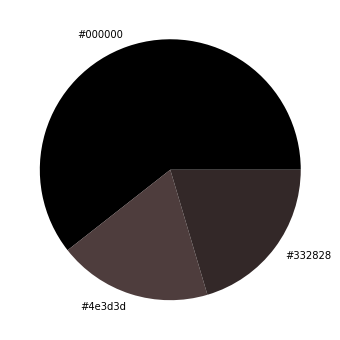

In [ ]:

get_colors(get_image('/content/drive/MyDrive/Purple/1-309.png'), 3, True)

[array([0.07268513, 0.06089963, 0.0448242 ]),
 array([144.38144509, 117.82079819,  76.43909225]),
 array([190.61589775, 161.41526991, 111.69656371]),
 array([86.82313236, 69.03420661, 44.98753003]),
 array([175.55548879, 146.73850868,  99.35961065]),
 array([108.58492666,  86.17865453,  54.61052099]),
 array([160.47877861, 132.48070782,  87.55667908]),
 array([204.85045188, 175.60346989, 124.72986345]),
 array([64.75475197, 50.26193788, 33.2546747 ]),
 array([127.33403178, 102.3935743 ,  65.11192596]),
 '#000000',
 '#90754c',
 '#bea16f',
 '#56452c',
 '#af9263',
 '#6c5636',
 '#a08457',
 '#ccaf7c',
 '#403221',
 '#7f6641']

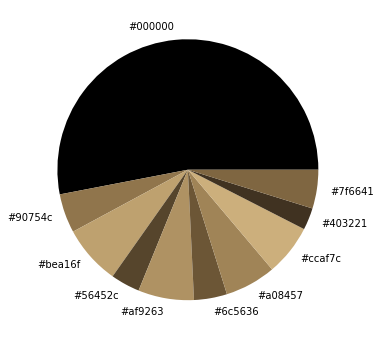

In [ ]:
get_colors(get_image('/content/drive/MyDrive/Purple/150.png'), 10, True)

Reading all images to be tested and putting in the accessible format.
Also defining which color to be selected in testing images

In [ ]:
IMAGE_DIRECTORY = '/content/drive/MyDrive/Purple'
COLORS = {
    'Color_needed': [[51.68225853, 40.36634375, 40.95244448]],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

Showing all the images. 

26


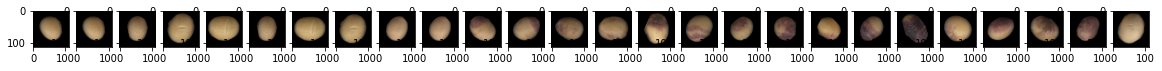

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
print(len(images))

Matching the image which is having particular color with specific threshold

In [ ]:

def match_image_by_color(image, color, threshold = 5, number_of_colors = 3): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(curr_color, selected_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

Presenting the matched image with number of count.

In [ ]:

def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    count=0
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 26, index)
            plt.imshow(images[i])
            index += 1
            count+=1

    print(count)

for the search color array([109.50865513,  86.88200348,  54.95288334]) from 150.png


3


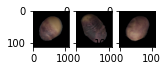

In [ ]:
# Search for Color_needed
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['Color_needed'], 10, 3)
#print(count)

5


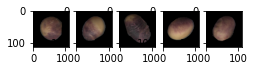

In [ ]:
# Search for Color_needed
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['Color_needed'], 12, 3)

Search image is array([51.68225853, 40.36634375, 40.95244448]) from 139.png


3


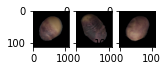

In [ ]:
# Search for Color_needed
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['Color_needed'], 10, 3)

5


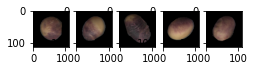

In [ ]:
# Search for Color_needed
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['Color_needed'], 12, 3)

9


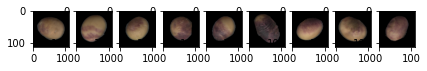

In [ ]:
# Search for Color_needed
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['Color_needed'], 15, 3)

26


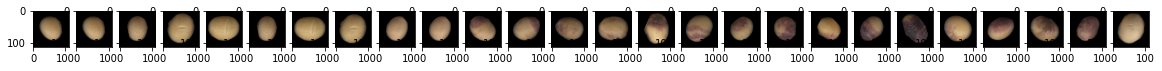

In [ ]:
# Search for Color_needed
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['Color_needed'], 20, 3)